In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("F:/Python/Body_Movement_Detection_Using_Gait_Recognition_Technollogy_7sem_Project/Dataset/HuGaDB_v2_various_01_00.csv")

In [3]:
X = data.drop('activity', axis=1).values
y = data['activity'].astype(str).values

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y) # type: ignore

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)
num_classes = len(label_encoder.classes_)


In [4]:
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [5]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)


Epoch 1/10
49/49 [==============================] - 6s 31ms/step - loss: 0.6198 - accuracy: 0.8286 - val_loss: 0.2206 - val_accuracy: 0.9436
Epoch 2/10
49/49 [==============================] - 1s 12ms/step - loss: 0.1517 - accuracy: 0.9608 - val_loss: 0.0918 - val_accuracy: 0.9744
Epoch 3/10
49/49 [==============================] - 1s 12ms/step - loss: 0.0794 - accuracy: 0.9782 - val_loss: 0.0615 - val_accuracy: 0.9846
Epoch 4/10
49/49 [==============================] - 1s 10ms/step - loss: 0.0584 - accuracy: 0.9827 - val_loss: 0.0430 - val_accuracy: 0.9872
Epoch 5/10
49/49 [==============================] - 1s 11ms/step - loss: 0.0484 - accuracy: 0.9846 - val_loss: 0.0497 - val_accuracy: 0.9795
Epoch 6/10
49/49 [==============================] - 1s 11ms/step - loss: 0.0403 - accuracy: 0.9859 - val_loss: 0.0337 - val_accuracy: 0.9897
Epoch 7/10
49/49 [==============================] - 1s 11ms/step - loss: 0.0360 - accuracy: 0.9865 - val_loss: 0.0277 - val_accuracy: 0.9872
Epoch 8/10
49

In [6]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')


16/16 [==============================] - 0s 8ms/step - loss: 0.0639 - accuracy: 0.9692
Test accuracy: 0.9691991806030273


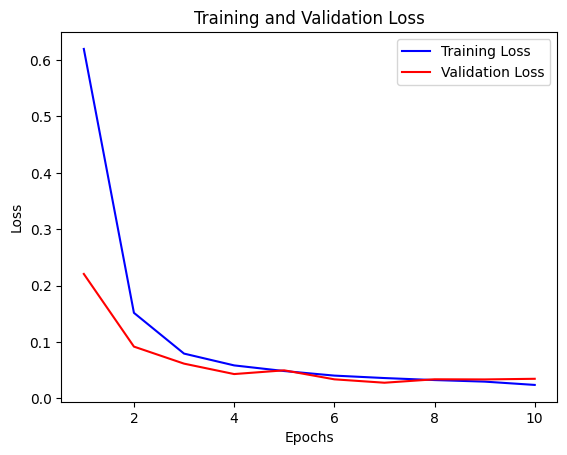

In [7]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs = range(1, len(training_loss) + 1)

plt.figure()
plt.plot(epochs, training_loss, 'b', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


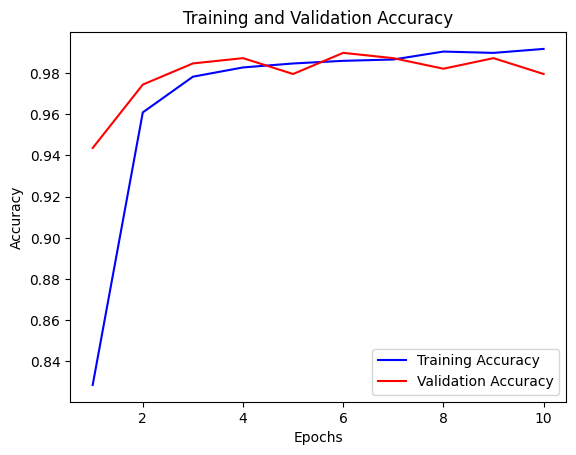

In [8]:
training_acc = history.history['accuracy']
validation_acc = history.history['val_accuracy']

plt.figure()
plt.plot(epochs, training_acc, 'b', label='Training Accuracy')
plt.plot(epochs, validation_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


16/16 [==============================] - 1s 7ms/step


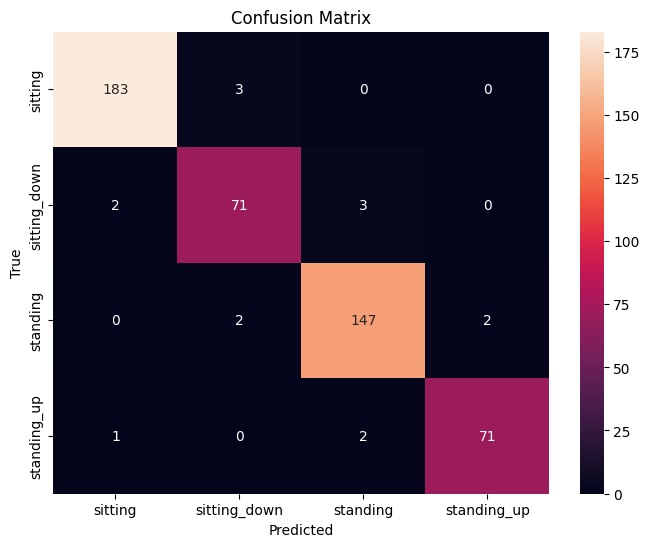

In [9]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  

y_true = label_encoder.inverse_transform(y_test)

y_pred_decoded = label_encoder.inverse_transform(y_pred_classes)

confusion_mat = confusion_matrix(y_true, y_pred_decoded, labels=label_encoder.classes_)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_) # type: ignore
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [10]:
sample_input = X_test[8:9]
predicted_probabilities = model.predict(sample_input)
predicted_class = np.argmax(predicted_probabilities)

predicted_activity = label_encoder.inverse_transform([predicted_class])
print(f'Predicted Class: {predicted_activity[0]}')

1/1 [==============================] - 0s 115ms/step
Predicted Class: sitting


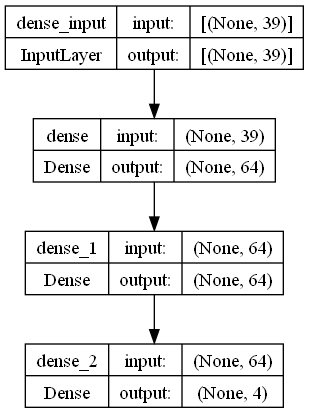

In [15]:
from tensorflow.keras.utils import plot_model # type: ignore

model_file = 'model_architecture.png'
plot_model(model, to_file=model_file, show_shapes=True, show_layer_names=True)

from IPython.display import Image
Image(filename=model_file)
